In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("dataset.csv")

In [13]:
data.shape

(1500, 3)

In [14]:
x_data = data['pixels']
y_data = data['emotion']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


<Figure size 640x480 with 1 Axes>

In [16]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming x_data and y_data are pandas Series
x_data_array = np.array(x_data).reshape(-1, 1)
y_data_array = np.array(y_data)

# Create RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Resample the data
x_resampled, y_resampled = oversampler.fit_resample(x_data_array, y_data_array)

print(x_resampled.shape, y_resampled.shape)


(1500, 1) (1500,)


In [18]:
y_data.value_counts()

emotion
0    300
1    300
4    300
3    300
2    300
Name: count, dtype: int64

In [19]:
x_data = pd.Series(x_data.values.flatten())
x_data

0       181 181 193 187 171 47 29 19 32 34 76 125 184 ...
1       227 231 179 67 76 78 89 86 77 67 50 38 36 44 6...
2       15 9 10 14 14 15 17 16 17 27 42 51 70 88 92 95...
3       119 130 137 165 182 175 162 156 151 159 169 17...
4       40 32 42 43 28 26 24 32 43 54 56 37 55 68 93 1...
                              ...                        
1495    224 232 224 227 207 192 93 72 77 72 67 56 55 5...
1496    255 255 251 255 249 163 103 148 171 161 158 16...
1497    25 26 26 27 23 25 22 25 25 30 31 31 34 34 38 4...
1498    199 180 47 34 63 90 113 151 153 155 158 160 15...
1499    115 124 105 94 101 101 39 52 60 47 58 61 68 63...
Length: 1500, dtype: object

In [20]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255

In [21]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(1500, 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)
print(x_train.shape," ",y_train.shape)

(1350, 2304)   (1350, 1)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# ***KNN CLASSIFIER*********

In [25]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.score(x_test,y_test)

0.4866666666666667

In [27]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[12,  3,  8,  5,  1],
       [11, 11,  9,  1,  2],
       [ 8,  5, 12,  4,  2],
       [ 0,  1,  0, 19,  2],
       [ 2,  0,  2, 11, 19]], dtype=int64)

Text(54.75, 0.5, 'Truth')

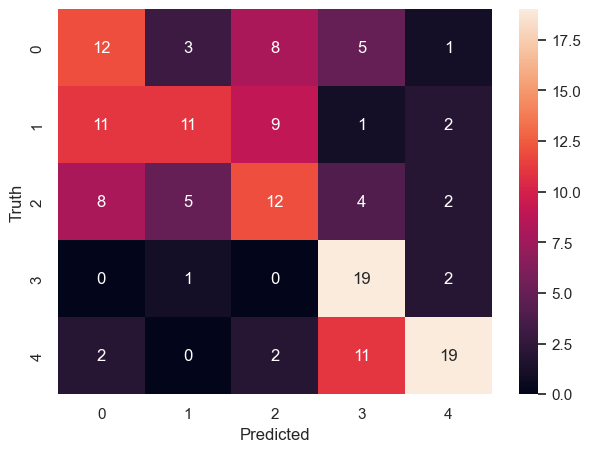

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [30]:
from joblib import dump, load
dump(knn, 'knn.joblib')

['knn.joblib']

# ***RANDOM FOREST***

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [32]:
model.score(x_test,y_test)

0.6133333333333333

In [33]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[15,  3,  8,  3,  0],
       [ 3, 21, 10,  0,  0],
       [ 4, 10, 17,  0,  0],
       [ 0,  0,  1, 15,  6],
       [ 6,  0,  1,  3, 24]], dtype=int64)

Text(54.75, 0.5, 'Truth')

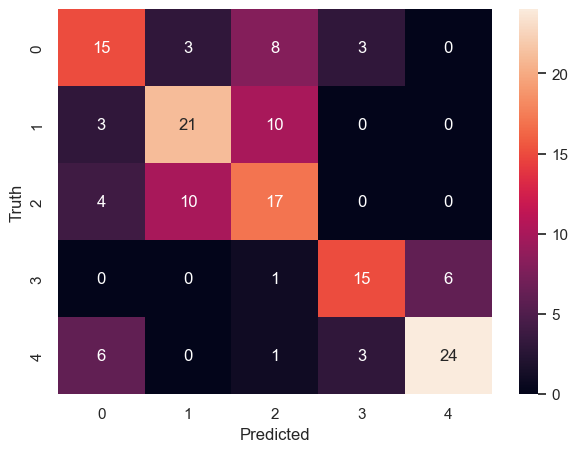

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [36]:
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

# GRADIO.APP

In [37]:
%pip install gradio



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


RANDOM FOREST MODEL

In [38]:
%pip install --upgrade typing-extensions


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
%pip install -U gradio


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import gradio as gr
import numpy as np
from PIL import Image
from joblib import load

# Load the trained model
model = load('random_forest_model.joblib')

emotion_labels = {
    0: "Angry",
    1: "Fear",
    2: "Sad",
    3: "Neutral",
    4: "Happy",
    5: "Other"
}

def preprocess_image(image):
    # Convert the image to grayscale
    gray_image = Image.fromarray(image).convert('L')
    # Resize the image to match the model's expected input size
    resized_image = gray_image.resize((48,48))
    # Flatten the image to a 1D array and normalize
    processed_image = np.array(resized_image).flatten().reshape(1, -1) / 255.0
    return processed_image

def predict_emotion(image):
    try:
        processed_image = preprocess_image(image)
        prediction = model.predict(processed_image)[0]
        emotion = emotion_labels[prediction]
        return emotion
    except Exception as e:
        print(f"Error predicting emotion: {str(e)}")
        return "Other"

iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(),
    outputs="text",
    title="Emotion Detection",
    description="Upload a grayscale image, convert it to black and white, and predict the emotion."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


KNN CLASSIFIER

In [ ]:
%pip uninstall gradio
%pip install gradio


^C
Note: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import gradio as gr

print(gr.__version__)


4.11.0


In [ ]:
%pip install -U gradio numpy pillow scikit-learn


                                              0.0/15.8 MB ? eta -:--:--
                                              0.0/15.8 MB ? eta -:--:--
                                              0.0/15.8 MB ? eta -:--:--
                                             0.0/15.8 MB 217.9 kB/s eta 0:01:13
                                             0.0/15.8 MB 217.9 kB/s eta 0:01:13
                                             0.0/15.8 MB 217.9 kB/s eta 0:01:13
                                             0.0/15.8 MB 150.6 kB/s eta 0:01:45
                                             0.0/15.8 MB 150.6 kB/s eta 0:01:45
                                             0.1/15.8 MB 254.2 kB/s eta 0:01:02
                                             0.1/15.8 MB 254.2 kB/s eta 0:01:02
                                             0.1/15.8 MB 254.2 kB/s eta 0:01:02
                                             0.1/15.8 MB 254.2 kB/s eta 0:01:02
                                             0.1/15.8 MB 201.3 k

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\~il\\_imaging.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\queueing.py", line 489, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\blocks.py", line 1533, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

In [43]:
import gradio as gr
import numpy as np
from PIL import Image
from joblib import load

# Load the trained model
model = load('knn.joblib')

emotion_labels = {
    0: "Angry",
    1: "Fear",
    2: "Sad",
    3: "Neutral",
    4: "Happy",
    5: "Other"
}

def preprocess_image(image):
    # Convert the image to grayscale
    gray_image = Image.fromarray(image).convert('L')
    # Resize the image to match the model's expected input size
    resized_image = gray_image.resize((48, 48))
    # Flatten the image to a 1D array and normalize
    processed_image = np.array(resized_image).flatten().reshape(1, -1) / 255.0
    return processed_image

def predict_emotion(image):
    try:
        processed_image = preprocess_image(image)
        prediction = model.predict(processed_image)[0]
        emotion = emotion_labels[prediction]
        return emotion
    except Exception as e:
        print(f"Error predicting emotion: {str(e)}")
        return "Other"

iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Image(),
    outputs="text",
    title="Emotion Detection",
    description="Upload a grayscale image, convert it to black and white, and predict the emotion."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
